In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from math import sqrt
from matplotlib import pyplot as plt
from itertools import chain
from subprocess import check_output

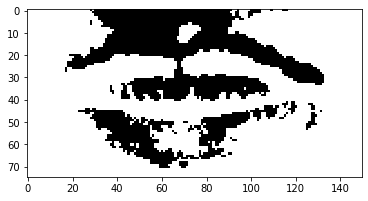

In [53]:
image = plt.imread("./output/5_0.jpg")
plt.imshow(image, cmap='Greys')
ret,img = cv2.threshold(image,30,255,0)
plt.imshow(img, cmap='Greys')

In [54]:
## Discover the first point 
for i, row in enumerate(img):
    for j, value in enumerate(row):
        if value == 255:
            start_point = (i, j)
            print(start_point, value)
            break
    else:
        continue
    break

(0, 28) 255


In [55]:
directions = [ 0,  1,  2,
               7,      3,
               6,  5,  4]
dir2idx = dict(zip(directions, range(len(directions))))

change_j =   [-1,  0,  1, # x or columns
              -1,      1,
              -1,  0,  1]

change_i =   [-1, -1, -1, # y or rows
               0,      0,
               1,  1,  1]

border = []
chain = []
curr_point = start_point
for direction in directions:
    idx = dir2idx[direction]
    new_point = (start_point[0]+change_i[idx], start_point[1]+change_j[idx])
    if img[new_point] != 0: # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

count = 0
while curr_point != start_point:
    #figure direction to start search
    b_direction = (direction + 5) % 8 
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        idx = dir2idx[direction]
        new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
        if image[new_point] != 0: # if is ROI
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break
    if count == 1000: break
    count += 1

In [56]:
print(count)
print(chain)

4
[4, 1, 6, 3, 0]


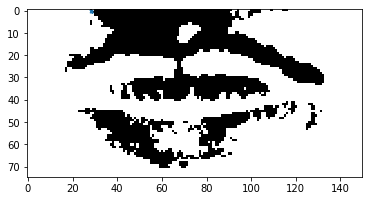

In [57]:
plt.imshow(img, cmap='Greys')
plt.plot([i[1] for i in border], [i[0] for i in border])